In [0]:
pip install torch gwpy lalsuite Pycbc

In [0]:
import numpy as np
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries
from tqdm import tqdm
import pywt
#-------------------------
#       Deep learning
import torch.nn as nn 
import torch 
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
#---Data reading and writing---------------
import csv
import h5py
import pandas as pd
from scipy import signal
#-------------------------
# DEFINING VARIABLES
#--------------------------
signal_gw=np.zeros((9000,16384))
next_val=0

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ls 'gdrive/My Drive/GW data'

data.h5


#training

In [0]:
#------------------------------------------------------------------
#                    TRAINING DATASETS PREPRATION               
#------------------------------------------------------------------

class dataprep:

#------------------------------------------------------------------
#                    SIMULATED SIGNALS+TRANSIENT NOISE
#------------------------------------------------------------------
  def simulated_signals(noise1,noise2,noise3,noise4):  
    global next_val,signal_gw
    
    #------------------------parameters------------------------------
    apx=['TaylorT1']
    check=np.zeros(len(noise1))
    len_apx=len(apx)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for a in (range(len_apx)):
        check=np.zeros(len(noise1))
        k=0
        for m1 in range (5,8,2):
          for m2 in range (5,8,2):
            for d in range(10,201,50):
              for fl in [80,120]:
                if (m1+m2+d+fl) not in check:
                  check[k]=m1+m2+d+fl
                  hp,hc = get_td_waveform(approximant=apx[a],
                                    mass1=m1,mass2=m2,
                                    delta_t=1.0/4096,
                                    f_lower=fl,f_final=50, 
                                    distance=d)
                  len_hp=len(hp)
                  signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)
                  if len_hp<=16385 :
                    pos=np.random.randint(0,len(noise1)-len(hp))
                    signal_gw[next_val:next_val+4,pos:pos+len(hp)]+=hp
                    writer = csv.writer(file)
                    writer.writerow([next_val,m1,m2,d,fl,50,.5,0,0,0,0,.5])
                    writer.writerow([next_val+1,m1,m2,d,fl,50,.5,0,0,0,0,.5])
                    writer.writerow([next_val+2,m1,m2,d,fl,50,.5,0,0,0,0,.5])
                    writer.writerow([next_val+3,m1,m2,d,fl,50,.5,0,0,0,0,.5])
                  k=k+1
                  next_val+=4

"""#------------------------------------------------------------------
#                    RINGDOWN+TRANSIENT NOISE
#------------------------------------------------------------------
  def ringdown(noise1,noise2,noise3,noise4):
    global next_val,signal_test,signal_train
    x=np.arange(0,.25*np.pi,.01)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for f in [500]:
        pos=np.random.randint(0,len(noise1)-len(x))
        y=np.sin(f*x)*np.exp(-5*x)*10e-22
        signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)
        signal_gw[next_val:next_val+4,pos:pos+len(x)]+=y
        writer = csv.writer(file)
        writer.writerow([next_val,0,0,0,f,f,0,0,0,.5,0,.5])
        writer.writerow([next_val+1,0,0,0,f,f,0,0,0,.5,0,.5])
        writer.writerow([next_val+2,0,0,0,f,f,0,0,0,.5,0,.5])
        writer.writerow([next_val+3,0,0,0,f,f,0,0,0,.5,0,.5])
      next_val=next_val+4
"""
#------------------------------------------------------------------
#                    ECHOES +TRANSIENT NOISE
#------------------------------------------------------------------
  def echoes(noise1,noise2,noise3,noise4):
    global next_val,signal_gw
    signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
    t=np.linspace(0,.3,np.random.randint(16384))
    i=0
    y=np.zeros(len(t))
    for j in range(0,np.random.randint(6)):
      for i in range(len(t)):
        aa=t[i]-0.0295-j*0.0295
        y[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.sin(2*np.pi*250*aa)
      pos=np.random.randint(0,len(noise1)-len(t))
      signal_gw[next_val:next_val+4,pos:pos+len(t)]+=y1
      next_val=next_val+4
      writer = csv.writer(file)
      writer.writerow([next_val,0,0,0,550,550,0,0,0,.5,0,.5])
      writer.writerow([next_val+1,0,0,0,250,250,0,0,0,.5,0,.5])
      writer.writerow([next_val+2,0,0,0,250,250,0,0,0,.5,0,.5])
      writer.writerow([next_val+3,0,0,0,250,250,0,0,0,.5,0,.5])
      signal_gw[next_val:next_val+4,pos:pos+len(x)]+=y2
      next_val=next_val+4
      writer = csv.writer(file)
      writer.writerow([next_val,0,0,0,550,550,0,0,0,.5,0,.5])
      writer.writerow([next_val+1,0,0,0,250,250,0,0,0,.5,0,.5])
      writer.writerow([next_val+2,0,0,0,250,250,0,0,0,.5,0,.5])
      writer.writerow([next_val+3,0,0,0,250,250,0,0,0,.5,0,.5])

#------------------------------------------------------------------
#                    GLITCHES+TRANSIENT NOISE
#------------------------------------------------------------------

  def wavelets(wave):
    wav = pywt.ContinuousWavelet(wave)
    width = wav.upper_bound - wav.lower_bound

    scales = [55]

    max_len = int(np.max(scales)*width + 1)
    t = np.arange(max_len)
    for n, scale in enumerate(scales):
        int_psi, x = pywt.integrate_wavelet(wav, precision=25)
        step = x[1] - x[0]
        j = np.floor(
            np.arange(scale * width + 1) / (scale * step))
        if np.max(j) >= np.size(int_psi):
            j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
        j = j.astype(np.int)
        int_psi /= np.abs(int_psi).max()
        filt = int_psi[j][::-1]
        nt = len(filt)
        t = np.linspace(-nt//2, nt//2, nt)
        return t,filt.real


  def glitches(wave,noise1,noise2,noise3,noise4):
    global next_val,signal_test,signal_train
    signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:

    #-------------SINE GAUSSIAN-------- ψ(t)=np.exp(−t**2/2)*cos(5t)
      if wave=='morl': 
          for f in [4]:
            t,y=dataprep.wavelets(wave)
            pos=np.random.randint(0,len(noise1)-len(y))
            signal_gw[next_val:next_val+4,pos:pos+len(y)]+=y*10e-22*np.cos(5*t)*np.cos(f*t)
            next_val+=4
    #-------------CHIRPING SINE GAUSSIAN--------------------------#
      if wave=='csg':
          for q in range(2,8):
            x=np.arange(0,np.pi/q,.0002)
            for k in range(2,20):
              for f in [100,200,300]:
                y=np.sin(2*np.pi*f*(k**x-1)/np.log(k))
                pos=np.random.randint(0,len(noise1)-len(y))
                signal_gw[next_val:next_val+4,pos:pos+len(y)]+=y
                next_val+=4
    #-----------------------------------AIR COMPRESSOR-------------------------
      if wave=='ac':
          for q in range(2,8):
            x=np.arange(0,q,1e-3)
            for k in range(2,25):
              for p in range(2,5):
                y=(5/np.sqrt(3)*(np.pi**(.25)))*np.exp(-x**2/k)*(1-x**p)
                pos=np.random.randint(0,len(noise1)-len(y))
                signal_gw[next_val:next_val+4,pos:pos+len(y)]+=y
                next_val+=4

    #----------------GAUSSIAN------------- ψ(t)=np.exp(−t**2)-----------------
      if wave=='gaus': 
          for f in [4]:
            w='gaus'+str(f)
            t,y=dataprep.wavelets(w)
            pos=np.random.randint(0,len(noise1)-len(y))          
            signal_gw[next_val:next_val+4,pos:pos+len(y)]+=y*10e-22
            next_val+=4
      writer = csv.writer(file)            
      writer.writerow([next_val,0,0,0,550,550,0,0,0,.5,0,.5])
      writer.writerow([next_val+1,0,0,0,550,550,0,0,0,.5,0,.5])
      writer.writerow([next_val+2,0,0,0,550,550,0,0,0,.5,0,.5])
      writer.writerow([next_val+3,0,0,0,550,550,0,0,0,.5,0,.5])

#------------------------------------------------------------------------------
#                             MIXED SIGNALS               
#------------------------------------------------------------------------------
  def mixed_signals(noise1,nosi2,nosie3,noise4):
    global next_val,signal_gw
    #------------------------base wave------------------------
    apx=['TaylorT1']
    check=np.zeros(len(noise1))
    with open('gdrive/My Drive/GW data/labels.csv', 'a', newline='') as file:
      for a in tqdm(range(len(apx))):
        check=np.zeros(len(noise1))
        k=0
        for m1 in range (5,8,2):
          for m2 in range (5,8,2):
            for d in range(10,201,50):
              for fl in [80,120]:
                if (m1+m2+d+fl) not in check:
                  check[k]=m1+m2+d+fl
                  hp,hc = get_td_waveform(approximant=apx[a],
                                    mass1=m1,mass2=m2,
                                    delta_t=1.0/4096,
                                    f_lower=fl,f_final=50, 
                                    distance=d)
                  len_hp=len(hp)
                  signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)

                  if len_hp<=16385 :
                    pos=np.random.randint(0,len(noise1)-len(hp))
                    signal_gw[next_val:next_val+4,pos:pos+len(hp)]+=hp                          
                  k=k+1

      for wav in tqdm(['morl','gaus2','gaus3','gaus4','gaus5','mexh','ac','csg']):

        if wav=='morl' or wav=='gaus2' or wav=='gaus3' or wav=='gaus4' or wav=='gaus5' or wav=='mexh' :
          t,y=dataprep.wavelets(wav)
          for i in range(4):
            pos=np.random.randint(0,len(noise1)-len(y))
            #signal_gw[next_val:next_val+4,pos:pos+len(hp)]+=y*10e-25
        #-------------------ac---------------------------#
        elif wav=='ac':
          for q in range(2,8):
            x=np.arange(0,np.pi/q,.0002)
            for c in range(2,20):
              for f in [40,45,50,60]:
                y=np.sin(2*np.pi*f*(k**x-1)/np.log(c))
                pos=np.random.randint(0,len(noise1)-len(y))
                signal_gw[next_val:next_val+4,pos:pos+len(y)]+=y
              #-------------------chirping sine gaussian---------------------------#
        elif wav=='csg':
          for q in range(2,8):
            x=np.arange(0,np.pi/q,.0002)
            for k in range(2,20):
              for f in [100,200,300]:
                y=np.sin(2*np.pi*f*(k**x-1)/np.log(k))
                pos=np.random.randint(0,len(noise1)-len(y))
                signal_gw[next_val:next_val+4,pos:pos+len(y)]+=y
        writer = csv.writer(file)
        writer.writerow([next_val,0,0,0,550,550,0,0,0,.5,0,.5])
        writer.writerow([next_val+1,0,0,0,550,550,0,0,0,.5,0,.5])
        writer.writerow([next_val+2,0,0,0,550,550,0,0,0,.5,0,.5])
        writer.writerow([next_val+3,0,0,0,550,550,0,0,0,.5,0,.5])
        next_val+=4

#random test

In [0]:
from pycbc.waveform import get_td_waveform
#apx=['EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM']#'SEOBNRv1','SEOBNRv2', 'SEOBNRv2_opt','SEOBNRv3_pert',(low) 'SEOBNRv3',(low ns)
apx=[ 'SEOBNRv1','SEOBNRv2', 'SEOBNRv2_opt']#'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'EOBNRv2_ROM', 'EOBNRv2HM_ROM', 'SEOBNRv2_ROM_DoubleSpin_HI', 'SEOBNRv4_ROM', 'IMRPhenomD_NRTidal', 'SpinTaylorF2', 'TaylorF2NL', 'SpinTaylorF2_SWAPPER']
len_apx=len(apx)
for a in (range(len_apx)):
  print(apx[a])
  for m1 in range (12,90,15):
    for m2 in range (12,90,15):
      for d in range(10,201,50):
        for fl in [30,80,60,120]:
          hp,hc = get_td_waveform(approximant=apx[a],
                              mass1=m1,mass2=m2,
                              #spin1z=.3,spin2z=.6,spin1x=2.0,
                              delta_t=1.0/4096,
                              f_lower=fl,f_final=50, 
                              distance=d)
        print(m1,m2,d,fl)

In [0]:
0from pycbc.waveform import get_td_waveform
apx=['IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'EOBNRv2_ROM', 'EOBNRv2HM_ROM', 'SEOBNRv2_ROM_DoubleSpin_HI', 'SEOBNRv4_ROM', 'IMRPhenomD_NRTidal', 'SpinTaylorF2', 'TaylorF2NL', 'SpinTaylorF2_SWAPPER']
len_apx=len(apx)
for a in (range(len_apx)):
  print(apx[a])
  for m1 in range (12,90,15):
    for m2 in range (12,90,15):
      for d in range(10,201,50):
        for fl in [30,80,60,120]:
          hp,hc = get_td_waveform(approximant=apx[a],
                              mass1=m1,mass2=m2,
                              #spin1z=.3,spin2z=.6,spin1x=2.0,
                              delta_t=1.0/4096,
                              f_lower=fl,f_final=50, 
                              distance=d)
        print(m1,m2,d,fl)

In [0]:
import numpy as np

h=np.add(hp,hc,dtype=complex)

In [0]:
print(hp[1])

In [0]:
import matplotlib.pyplot as plt
plt.plot(hp)

In [0]:
plt.specgram(hp,Fs=1024)

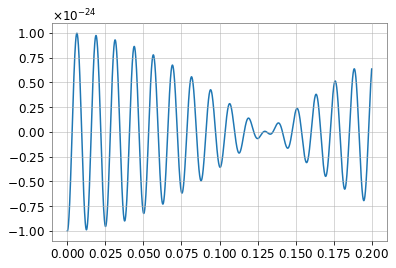

In [0]:
x=np.linspace(0,.2,3000)
y=10e-25*np.cos(500*x+500*np.pi/2)*np.cos(12*x+3 0*np.pi/2)
plt.plot(x,y)
plt.show()

(array([[8.00561504e-50, 9.53817623e-50, 9.48628088e-50,
         8.20933494e-50, 6.27607434e-50, 4.23204574e-50],
        [5.78805531e-49, 5.30627145e-49, 4.62798979e-49,
         3.79743260e-49, 2.92082689e-49, 2.10661579e-49],
        [8.99433748e-48, 7.14112062e-48, 5.64140826e-48,
         4.41455888e-48, 3.41402261e-48, 2.60971233e-48],
        ...,
        [2.21190972e-58, 1.52556345e-58, 9.57091331e-59,
         5.47421331e-59, 2.94001550e-59, 1.66507029e-59],
        [2.18495763e-58, 1.46229445e-58, 8.55956509e-59,
         4.23412681e-59, 1.66906332e-59, 5.31018713e-60],
        [1.08799580e-58, 7.20616088e-59, 4.11141575e-59,
         1.91060627e-59, 6.22932202e-60, 7.67018058e-61]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,
         36.,  40.,  44.,  48.,  52.,  56.,  60.,  64.,  68.,
         72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148., 152., 156., 160., 164., 168

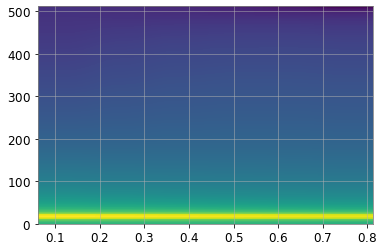

In [0]:
plt.specgram(y,Fs=1024)

8207


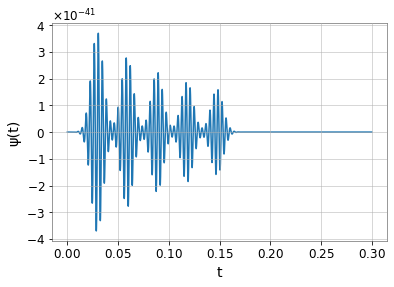

In [0]:
import matplotlib.pyplot as plt
t=np.linspace(0,.3,np.random.randint(16384))
y=np.zeros(len(t))
for j in range(0,np.random.randint(6)):
  for i in range(len(t)):
    aa=t[i]-0.0295-j*0.0295
    y[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.sin(2*np.pi*250*aa)
plt.xlabel('t')
plt.ylabel('ψ(t)')
plt.plot(t,y)
print(len(y))

16384


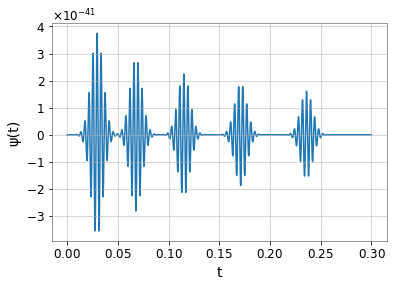

In [0]:
t=np.linspace(0,.3,16384)
y=np.zeros(len(t))
r=.3
for j in range(0,np.random.randint(8)):
  for i in range(len(t)):
    aa=t[i]-0.0295-j*0.0295-(j*(j+1)/2)*r*0.0295
    y[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*250*aa)
plt.xlabel('t')
plt.ylabel('ψ(t)')
plt.plot(t,y)
print(len(y))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(array([[1.60272785e-091, 1.92557953e-090, 1.50083311e-087, ...,
         1.17512804e-306, 3.90262454e-319, 0.00000000e+000],
        [2.32291302e-090, 4.80583375e-088, 3.42972980e-086, ...,
         7.74532864e-305, 7.46300980e-319, 0.00000000e+000],
        [1.15300498e-089, 2.80265261e-087, 1.99470770e-085, ...,
         2.48007755e-304, 6.46153874e-319, 0.00000000e+000],
        ...,
        [3.35922913e-103, 5.08410590e-101, 8.99503383e-100, ...,
         2.42455634e-312, 0.00000000e+000, 0.00000000e+000],
        [3.16823593e-103, 3.89209844e-101, 2.31097921e-100, ...,
         2.26754983e-312, 0.00000000e+000, 0.00000000e+000],
        [1.55233806e-103, 1.74770535e-101, 4.32896991e-102, ...,
         1.10764875e-312, 0.00000000e+000, 0.00000000e+000]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,
         36.,  40.,  44.,  48.,  52.,  56.,  60.,  64.,  68.,
         72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128.,

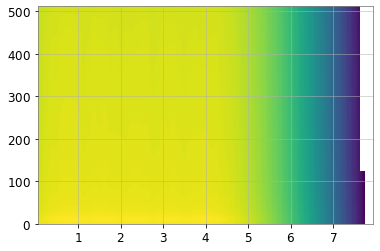

In [0]:
plt.specgram(y,Fs=1024)

#pipelines

In [0]:
def train_pipeline(noise1,noise2,noise3,noise4):
  global next_val,signal_gw
  val=dataprep
  with open('gdrive/My Drive/GW data/labels.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id','m1','m2','d','fl','fu','NS-NS','BH-BH','BH-NS','ringdown','glitch','noise'])
  val.simulated_signals(noise1,noise2,noise3,noise4)    #25600 simulated
  print('\nSimulated GW training set 100%')
  next_val=next_val-1
  print('data size :'+ str(next_val)+'\n\n')
  print('\nRingown training set ......')
  val.ringdown(noise1,noise2,noise3,noise4)
  print('\nRingown training set 100%','data size :'+ str(next_val)+'\n\n')
  print('\nEchoes training set ......')
  val.echoes(noise1,noise2,noise3,noise4)
  print('\nEchoes training set 100%' ,'data size :'+ str(next_val)+'\n\n') 
  print('\Glitches training set ......')
  print('data size :'+ str(next_val)+'\n')
  val.glitches('morl',noise1,noise2,noise3,noise4)      #---SINE GAUSSIAN-------- ψ(t)=np.exp(−t**2/2)*cos(5t)
  print('data size :'+ str(next_val)+'\n')
  val.glitches('gaus',noise1,noise2,noise3,noise4)      #---GAUSSIAN------------- ψ(t)=np.exp(−t**2)
  print('data size :'+ str(next_val)+'\n')
  val.glitches('csg',noise1,noise2,noise3,noise4)
  print('data size :'+ str(next_val)+'\n')
  val.glitches('ac',noise1,noise2,noise3,noise4)
  print('data size :'+ str(next_val)+'\n')
  print('\nGlitch training set 100%')
  print('data size :'+ str(next_val)+'\n')
  print('\nMixed training set ......')
  val.mixed_signals(noise1,noise2,noise3,noise4)
  print('\nMixed training set 100%')
  print('data size :'+ str(next_val)+'\n\n')
  hf = h5py.File('gdrive/My Drive/GW data/dataset.h5', 'w')
  hf.create_dataset('dataset', data=signal_gw)
  hf.close()

#DL MODEL

In [0]:
class PrepData(Dataset):
  def __init__(self,images,labels):
    self.image=images
    self.label=labels
  def __len__(self):
    return len(self.image)
  def __getitem__(self,index):
    data = self.image[index]
    data=data.unsqueeze(0)
    return (data,self.label[index])

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv1d(in_channels=16384, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool1d(kernel_size=2)
        self.cnn2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(32 * 7, 10) 

    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out

def model_prep():
  neuron=CNN()
  print(neuron)
  #----------------------neuron model parameters-------------------------------------
  print(neuron.parameters())
  print(len(list(neuron.parameters())))
  print(list(neuron.parameters())[0].size())
  print(list(neuron.parameters())[1].size())
  print(list(neuron.parameters())[2].size())
  print(list(neuron.parameters())[3].size())
  print(list(neuron.parameters())[4].size())
  print(list(neuron.parameters())[5].size())

  #-------------------------------------labels---------------------------------------
  labels=pd.read_csv('gdrive/My Drive/GW data/labels.csv')
  #-------------------------------------loading data---------------------------------
  hf_train = h5py.File('gdrive/My Drive/GW data/dataset.h5', 'r')
  group_key = list(hf_train.keys())[0]
  data= hf_train[group_key]
  data = torch.from_numpy(np.array(data))
  print(data.shape,type(data))
#------------------------------------------SPLIT DATA--------------------------------

#------------------------------------------------------------------------------------
  train=data.unsqueeze(1)
  print(train.shape)

  train_data=PrepData(data,labels)
  test_data=PrepData(data,labels)
  #print(train_data[1][1],'\n',train_data[1][0])

  train_loader = DataLoader(dataset=train_data,batch_size=50,shuffle=True)
  test_loader=DataLoader(dataset=test_data,batch_size=50,shuffle=False)

  a,b=next(iter(test_loader))
  print(a.shape,b.shape)

def train_data():
  criterion=nn.CrossEntropyLoss()
  optimizer=optim.SGD(neuron.parameters(),1e-3)
  iter = 0
  for epoch in tqdm(range(2)):
      for i, (images, labels) in enumerate(train_loader):
          images = images.requires_grad_()
          optimizer.zero_grad()
          outputs = neuron(images.float())
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          iter += 1

      correct = 0
      total = 0

      for images, labels in test_loader:
          images = images.requires_grad_()
          outputs = neuron(images.float())
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum()
          accuracy = 100 * correct / total
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

 ## HYPERPARAMETER TUNING

In [0]:
#HYPERPARAMETER TUNING

#Naming the Training Runs for TensorBoard

# PyTorch version 1.1.0 SummaryWriter class
if not log_dir:
    import socket
    from datetime import datetime
    current_time = datetime.now().strftime('%b%d_%H-%M-%S')
    log_dir = os.path.join(
        'runs', 
        current_time + '_' + socket.gethostname() + comment
    )
self.log_dir = log_dir


#Choosing a Name for the Run

tb = SummaryWriter(comment=f' batch_size={batch_size} lr={lr}')

#Experimenting with Hyperparameter Values

#Parameter Lists

batch_size_list = [50, 100, 250, 500, 1000, 5000, 10000]
lr_list = [.01, .001, .0001, .00001]
epoch_list = [2, 5, 10, 20, 50, 75, 100]

#Nested Iteration

for batch_size in batch_size_list:
    for lr in lr_list:
        network = Network()

        train_loader = torch.utils.data.DataLoader(
            train_set, batch_size=batch_size
        )
        optimizer = optim.Adam(
            network.parameters(), lr=lr
        )

        images, labels = next(iter(train_loader))
        grid = torchvision.utils.make_grid(images)

        comment=f' batch_size={batch_size} lr={lr}'
        tb = SummaryWriter(comment=comment)
        tb.add_image('images', grid)
        tb.add_graph(network, images)

        for epoch in epoch_list:
            total_loss = 0
            total_correct = 0
            for batch in train_loader:
                images, labels = batch # Get Batch
                preds = network(images) # Pass Batch
                loss = F.cross_entropy(preds, labels) # Calculate Loss
                optimizer.zero_grad() # Zero Gradients
                loss.backward() # Calculate Gradients
                optimizer.step() # Update Weights

                total_loss += loss.item() * batch_size              #This multiplies the average loss by batch size to obtain the absolute total loss
                total_correct += get_num_correct(preds, labels)

            tb.add_scalar(
                'Loss', total_loss, epoch
            )
            tb.add_scalar(
                'Number Correct', total_correct, epoch
            )
            tb.add_scalar(
                'Accuracy', total_correct / len(train_set), epoch
            )

            for name, param in network.named_parameters():
                tb.add_histogram(name, param, epoch)
                tb.add_histogram(f'{name}.grad', param.grad, epoch)

            print(
                "epoch", epoch
                ,"total_correct:", total_correct
                ,"loss:", total_loss
            )  
        tb.close()

#Visualizing the results with interactive graphs 

tensorboard --logdir runs"""

'#HYPERPARAMETER TUNING\n\n#Naming the Training Runs for TensorBoard\n\n# PyTorch version 1.1.0 SummaryWriter class\nif not log_dir:\n    import socket\n    from datetime import datetime\n    current_time = datetime.now().strftime(\'%b%d_%H-%M-%S\')\n    log_dir = os.path.join(\n        \'runs\', \n        current_time + \'_\' + socket.gethostname() + comment\n    )\nself.log_dir = log_dir\n\n\n#Choosing a Name for the Run\n\ntb = SummaryWriter(comment=f\' batch_size={batch_size} lr={lr}\')\n\n#Experimenting with Hyperparameter Values\n\n#Parameter Lists\n\nbatch_size_list = [50, 100, 250, 500, 1000, 5000, 10000]\nlr_list = [.01, .001, .0001, .00001]\nepoch_list = [2, 5, 10, 20, 50, 75, 100]\n\n#Nested Iteration\n\nfor batch_size in batch_size_list:\n    for lr in lr_list:\n        network = Network()\n\n        train_loader = torch.utils.data.DataLoader(\n            train_set, batch_size=batch_size\n        )\n        optimizer = optim.Adam(\n            network.parameters(), lr=lr\n

##data prep

In [0]:

#--------------------------------------------------------
#                           MAIN                    -----
#--------------------------------------------------------
#if __name__ == '__main__':


In [0]:
global next_val
next_val=0
print('\nCollecting noise.....\n data size : '+str(next_val))
noise1=TimeSeries.fetch_open_data('H1', 1164562433, 1164562437)
noise2=TimeSeries.fetch_open_data('H1', 1164562438, 1164562442)
noise3=TimeSeries.fetch_open_data('H1', 1164562443, 1164562447)
noise4=TimeSeries.fetch_open_data('H1', 1164562448, 1164562452)
#noise1=10e-22*np.random.rand(16384)
#noise2=10e-22*np.random.rand(16384)
#noise3=10e-22*np.random.rand(16384)
#noise4=10e-22*np.random.rand(16384)
print('\nCollecting noise..... 100%')


 data size : 0



In [0]:
print('\n\nPreparing training data..... ')
train_pipeline(noise1,noise2,noise3,noise4) #--------training-------------#
print('\nPreparing training data........100%\n\n')

In [0]:
model_prep()
train_data()

#1D input

In [0]:
input_1d = input_1d.unsqueeze(0).unsqueeze(0)
input_1d.shape

In [0]:
cnn1d_1 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=1)
print("cnn1d_1: \n")
print(cnn1d_1(input_1d).shape, "\n")
print(cnn1d_1(input_1d))

In [0]:
cnn1d_2 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=2)
print("cnn1d_2: \n")
print(cnn1d_2(input_1d).shape, "\n")
print(cnn1d_2(input_1d))

In [0]:
cnn1d_3 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=2, stride=1)
print("cnn1d_3: \n")
print(cnn1d_3(input_1d).shape, "\n")
print(cnn1d_3(input_1d))

In [0]:
cnn1d_4 = nn.Conv1d(in_channels=1, out_channels=5, kernel_size=3, stride=1)
print("cnn1d_4: \n")
print(cnn1d_4(input_1d).shape, "\n")
print(cnn1d_4(input_1d))

#2D input

In [0]:
input_2d = input_2d.unsqueeze(0)
input_2d.shape

In [0]:
cnn1d_5 = nn.Conv1d(in_channels=2, out_channels=1, kernel_size=3, stride=1)
print("cnn1d_5: \n")
print(cnn1d_5(input_2d).shape, "\n")
print(cnn1d_5(input_2d))

In [0]:
cnn1d_6 = nn.Conv1d(in_channels=2, out_channels=1, kernel_size=3, stride=2)
print("cnn1d_6: \n")
print(cnn1d_6(input_2d).shape, "\n")
print(cnn1d_6(input_2d))

In [0]:
cnn1d_7 = nn.Conv1d(in_channels=2, out_channels=1, kernel_size=2, stride=1)
print("cnn1d_7: \n")
print(cnn1d_7(input_2d).shape, "\n")
print(cnn1d_7(input_2d))

In [0]:
cnn1d_8 = nn.Conv1d(in_channels=2, out_channels=5, kernel_size=3, stride=1)
print("cnn1d_8: \n")
print(cnn1d_8(input_2d).shape, "\n")
print(cnn1d_8(input_2d))

#keras

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
import numpy as np

In [0]:
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)
print(x_train,y_train,x_test,y_test)

In [0]:
import matplotlib.pyplot as plt
plt.plot(x_train[0][2][0])

In [0]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=50, epochs=2)
score = model.evaluate(x_test, y_test, batch_size=50)

#DL 2D

In [0]:
import numpy as np
a=np.random.random((5,2,4))
print(a)

[[[0.62031148 0.33361018 0.74944997 0.62588731]
  [0.06493092 0.75860347 0.80043391 0.08674986]]

 [[0.16159865 0.02897903 0.43079341 0.66420871]
  [0.04318889 0.58725854 0.64984574 0.81177346]]

 [[0.11185927 0.43319302 0.79657114 0.9303302 ]
  [0.89176708 0.85658804 0.86441365 0.44845843]]

 [[0.62451963 0.16092363 0.86829844 0.34686142]
  [0.33422578 0.84930672 0.85563762 0.90740407]]

 [[0.59800364 0.39022334 0.82474788 0.99362511]
  [0.32354542 0.33791578 0.42017177 0.12748543]]]


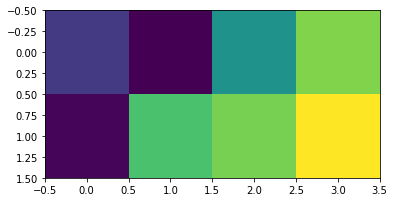

In [0]:
plt.imshow(a[1])

In [0]:
import csv
import h5py
import pandas as pd
import torch 
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn 
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [0]:
class PrepData(Dataset):
  def __init__(self,images,labels):
    self.image=images
    self.label=labels
  def __len__(self):
    return len(self.image)
  def __getitem__(self,index):
    data = self.image[index]
    data=data.unsqueeze(0)
    return (data,self.label[index])

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()        
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu3 = nn.ReLU()  
        self.cnn4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.relu4 = nn.ReLU()  
        self.cnn5 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu5 = nn.ReLU()  
        
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn6 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu6 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=224, out_features=10,bias=True) 

    def forward(self, x):
        out = self.relu1(self.cnn1(x))
        out = self.relu2(self.cnn2(out))
        out = self.relu3(self.cnn3(out))
        out = self.relu4(self.cnn4(out))
            
        out = self.maxpool1(self.relu5(self.cnn5(out)))
        out = self.maxpool2(self.relu6(self.cnn6(out)))
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out

  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([5000, 5, 28]) <class 'torch.Tensor'>
train: torch.Size([4000, 5, 28]) torch.Size([4000]) 
 test: torch.Size([999, 5, 28]) torch.Size([999])


100%|██████████| 5/5 [01:05<00:00, 13.10s/it]


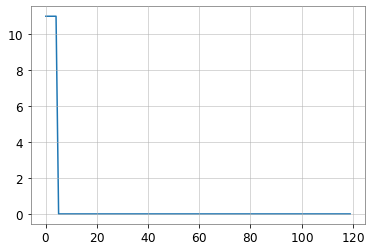

In [0]:


def training(train_loader,test_loader,optimizer,criterion,neuron):
 y=np.zeros(120)
 iter = 0
 for epoch in tqdm(range(5)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.requires_grad_()
        optimizer.zero_grad()

        outputs = neuron(images.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1

    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.requires_grad_()
        outputs = neuron(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accuracy = 100 * correct / total
    #print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
    y[epoch]=accuracy
 plt.plot(y)
 plt.show()
#----------------------------------------------------------------------
def model_prep(train,test,train_labels,test_labels):
 neuron=CNN()
 criterion=nn.CrossEntropyLoss()
 optimizer=optim.SGD(neuron.parameters(),1e-3)
 train_data=PrepData(train,train_labels)
 test_data=PrepData(test,test_labels)
 train_loader = DataLoader(dataset=train_data,batch_size=100,shuffle=True)
 test_loader=DataLoader(dataset=test_data,batch_size=100,shuffle=False)
 a,b=next(iter(test_loader))
 #print(a.shape,b.shape)
 training(train_loader,test_loader,optimizer,criterion,neuron)
#----------------------------------------------------------------------

if __name__ == '__main__':
 data=torch.from_numpy(np.random.random((5000,5,28)))
 data_labels=torch.from_numpy(np.random.randint(10,size=5000))
 print(data.shape,type(data))

 train,test=data[:4000,:],data[4001:,:]
 train_labels,test_labels=data_labels[:4000],data_labels[4001:]
 #plt.imshow(train[0])
 #plt.show()
 #train,test=train.unsqueeze(1),test.unsqueeze(1)
 print("train:",train.shape,train_labels.shape,'\n',"test:",test.shape,test_labels.shape)
 model_prep(train,test,train_labels,test_labels)


#DL 1D

In [0]:
class PrepData(Dataset):
  def __init__(self,images,labels):
    self.image=images
    self.label=labels
  def __len__(self):
    return len(self.image)
  def __getitem__(self,index):
    data = self.image[index]
    #data=data.unsqueeze(0)
    return (data,self.label[index])

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.cnn2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()        
        self.cnn3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu3 = nn.ReLU()  
        self.cnn4 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.relu4 = nn.ReLU()  
        self.cnn5 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu5 = nn.ReLU()  
        
        self.maxpool1 = nn.MaxPool1d(kernel_size=2)
        self.cnn6 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu6 = nn.ReLU()
        self.maxpool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=131072, out_features=10,bias=True) 

    def forward(self, x):
        out = self.relu1(self.cnn1(x))
        out = self.relu2(self.cnn2(out))
        out = self.relu3(self.cnn3(out))
        out = self.relu4(self.cnn4(out))
            
        out = self.maxpool1(self.relu5(self.cnn5(out)))
        out = self.maxpool2(self.relu6(self.cnn6(out)))
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out

In [0]:
def training(train_loader,test_loader,optimizer,criterion,neuron):
 y=np.zeros(120)
 iter = 0
 for epoch in (range(3)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.requires_grad_()
        optimizer.zero_grad()

        outputs = neuron(images.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1

    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.requires_grad_()
        outputs = neuron(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accuracy = 100 * correct / total
    print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
    y[epoch]=accuracy
 plt.plot(y)
 plt.show()

In [0]:
def model_prep(train,test,train_labels,test_labels):
 neuron=CNN()
 criterion=nn.CrossEntropyLoss()
 optimizer=optim.SGD(neuron.parameters(),1e-3)
 train_data=PrepData(train,train_labels)
 test_data=PrepData(test,test_labels)
 train_loader = DataLoader(dataset=train_data,batch_size=200,shuffle=True)
 test_loader=DataLoader(dataset=test_data,batch_size=200,shuffle=False)
 a,b=next(iter(test_loader))
 #print(a.shape,b.shape)
 training(train_loader,test_loader,optimizer,criterion,neuron)

torch.Size([10000, 1, 16384]) <class 'torch.Tensor'>


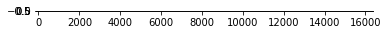

In [0]:
data=torch.from_numpy(np.random.random((10000,1,16384)))
data_labels=torch.from_numpy(np.random.randint(10,size=10000))
print(data.shape,type(data))
plt.imshow(data[1])

In [0]:
train,test=data[:1800,:],data[1800+1:,:]
train_labels,test_labels=data_labels[:1800],data_labels[1800+1:]
plt.imshow(train[0])
plt.show()
#train,test=train.unsqueeze(1),test.unsqueeze(1)
print("train:",train.shape,train_labels.shape,'\n',"test:",test.shape,test_labels.shape)
model_prep(train,test,train_labels,test_labels)

# JUST


In [0]:
noise1=TimeSeries.fetch_open_data('H1', 1164562433, 1164562437)
noise2=TimeSeries.fetch_open_data('H1', 1164562438, 1164562442)
noise3=TimeSeries.fetch_open_data('H1', 1164562443, 1164562447)
noise4=TimeSeries.fetch_open_data('H1', 1164562448, 1164562452)

In [0]:
from tqdm import tqdm 
import numpy as np
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries

noise1,noise2,noise3,noise4=np.random.rand(16384),np.random.rand(16384),np.random.rand(16384),np.random.rand(16384)
signal_gw=np.zeros((10000,16384))
next_val=0
apx=['SEOBNRv1']
check=np.zeros(len(noise1))
len_apx=len(apx)
for a in (range(len_apx)):
  check=np.zeros(len(noise1))
  k=0
  for m1 in tqdm(range (50,100,5)):
    for m2 in range (5,21,5):
      for d in range(100,1001,50):
        for fl in [30,60,80,120]:
          if (m1+m2+d+fl) not in check:
            check[k]=m1+m2+d+fl
            hp,hc = get_td_waveform(approximant=apx[a],
                                    mass1=m1,mass2=m2,
                                    delta_t=1.0/4096,
                                    #spin1x=np.random.random(1),spin1y=np.random.random(1),spin1z=np.random.random(1),
                                    #spin2x=np.random.random(1),spin2y=np.random.random(1),spin2z=np.random.random(1),
                                    f_lower=fl,f_final=50, 
                                    distance=d)
            len_hp=len(hp)
            signal_gw[next_val:next_val+4]=np.copy(noise1),np.copy(noise2),np.copy(noise3),np.copy(noise4)
            if len_hp<=16385 :
              pos=np.random.randint(0,len(noise1)-len(hp))
              signal_gw[next_val:next_val+4,pos:pos+len(hp)]+=hp
            k=k+1
            next_val+=4

print(next_val)

In [0]:
spin1x=np.random.random(1)
print(spin1x)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries

In [0]:
for m1 in range(5,19,2):
  for m2 in range(5,19,2):
    for d in range(10,1001,50):
      for fl in [30,60,80,120]:
        hp,hc = get_td_waveform(approximant='IMRPhenomB',
                            mass1=m1,mass2=m2,
                            delta_t=1.0/4096,
                            f_lower=fl,f_final=50, 
                            distance=d)
plt.xlabel('t')
plt.ylabel('h(t)')
plt.plot(hp)

In [0]:
\begin{center}
\begin{subequation}
\[   
\gamma (t) = 
     \begin{cases}
       \text{t \in [0,0.02),}   &\quad\text{\sin x}\\ 
       \text{t \in (02,0.04),}  &\quad\text{5\sin 3x}\\
       \text{t \in (0.04,0.1],} &\quad\text{\sin x}\\
     \end{cases}
\]\\
\phi(t) = \gamma (t)+ \epsilon(t) \forall t \in [0,0.1]